Observações sobre o dataset:
- O intervalo das datas de lançamento variam entre os anos de  1925 a 2021;

In [3]:
#importando as bibliotecas de visualização:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

base_netflix = pd.read_csv('netflix_titles.csv')
base_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


No primeiro contato com este conjunto de dados foi possível notar que temos 12 colunas no dataframe. E cada coluna tem o seguinte significado:

* show_id: Identificação única de cada linha da base de dados(PK)
* type: Categoria/classificação do que se trata o vídeo.
* title: Nome do vídeo em questão
* director: Nome do diretor do vídeo.
* cast: Nome do elenco que participa do vídeo.
* country: Países onde foi produzido o vídeo.
* data_added: data em que o vídeo foi adicionado a netflix.
* release_year: Ano que o filme foi lançado.
* rating: Classificação de faixa etária 
* duration: Tempo de duração(temporadas ou minutos).
* listed_in: Gênero do vídeo.
* description: Resumo sobre o que se trata o vídeo.

In [5]:
# Tipos de dados do dataframe
base_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
# Visualizando tamanho do dataframe
base_netflix.shape

(8807, 12)

* Este dataframe possui no geral 8807 linhas de dados, com  11 colunas do tipo objeto e 1 coluna do tipo int64.

* Esta função nos retornou a quantidade de valores não nulos em cada coluna. Pode se perceber que 6 colunas possuem dados nulos.

Identificando o ano de lançamento do Filme/Tv show mais novo/velho no catálogo da Netflix

In [7]:
#Verificando a data de lançamento mais antiga

min(base_netflix.release_year)

1925

In [8]:
#Verificando a data de lançamento mais atual

max(base_netflix.release_year)

2021

Tratando Dados

In [9]:
# Verificando valores nulos no dataframe
base_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# proporção de nulos coluna director
2634/8807

0.29908027705234475

In [11]:
# proporção de nulos da coluna cast
825/8807

0.09367548540933349

In [12]:
# Dando update nos valores nulos da coluna cast
base_netflix.update(base_netflix['cast'].fillna('Autores Desconhecidos'))

In [13]:
# Dando update nos valores nulos da coluna director
base_netflix.update(base_netflix['director'].fillna('Diretor Desconhecido'))

In [14]:
# Dando update nos valores nulos da coluna country
base_netflix.update(base_netflix['country'].fillna('Região desconhecida'))

In [15]:
# Excluindo linhas com dados faltante da coluna duration, rating e date_added
base_netflix = base_netflix.dropna(subset =['duration'])
base_netflix = base_netflix.dropna(subset =['rating'])
base_netflix = base_netflix.dropna(subset =['date_added'])

Podemos observar que as colunas 'cast', 'director' e 'country' contém valores nulos significantes para interferência na análise dos dados. Então substituimos os valores faltantes por 'Autores Desconhecidos', 'Diretor Desconhecido' e 'Região Desconhecida'. E para as colunas 'duration', 'rating' e 'date_added' que contém uma pequena quantidade de valores nulos, decidimos excluir as linhas faltantes.

In [16]:
# Quantidade de valores únicos por coluna tirando NaN
base_netflix.nunique()

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          749
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

Identificando a Proporção de Filmes e TV show(Seriado) que contém na Netflix

In [17]:
# Quantidade de Filmes/TV show na Netflix
tipos_quantidade = base_netflix['type'].value_counts(normalize = True)*100
tipos_quantidade

Movie      69.692833
TV Show    30.307167
Name: type, dtype: float64

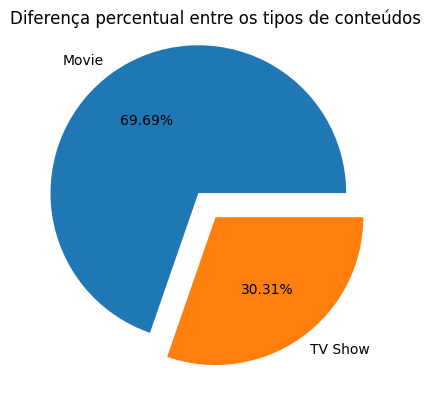

In [18]:
plt.pie(x=tipos_quantidade.values, labels=tipos_quantidade.index,
        autopct='%.2f%%', explode=[.2, 0]) #distância entre as 'fatias' do gráfico
plt.title('Diferença percentual entre os tipos de conteúdos')
plt.show()

Verificamos que praticamente 70% dos conteúdos da Netflix são compostos por Filmes e 30% por Tv Show(Seriados).

Identificando o total de Filme/TV show(Seriado) lançado por país

In [19]:
# Total de Filmes/TV show por país
base_netflix['country'] = base_netflix['country'].str.split(', ')
new_base_netflix = base_netflix.explode('country')

Identificamos que algumas linhas da coluna 'country' continha mais de um país e decidimos separá-los em linhas diferentes. 

In [20]:
base_netflix.shape

(8790, 12)

In [21]:
# Total de Filmes/TV show por país
top_countries = pd.crosstab(new_base_netflix["country"], new_base_netflix["type"], margins = True).sort_values(by = 'Movie', ascending = False).head(20)
top_countries

type,Movie,TV Show,All
country,,,
All,7809,3019,10828
United States,2748,932,3680
India,962,84,1046
United Kingdom,532,271,803
Região desconhecida,439,390,829
Canada,319,126,445
France,303,90,393
Germany,182,44,226
Spain,171,61,232


<AxesSubplot: ylabel='country'>

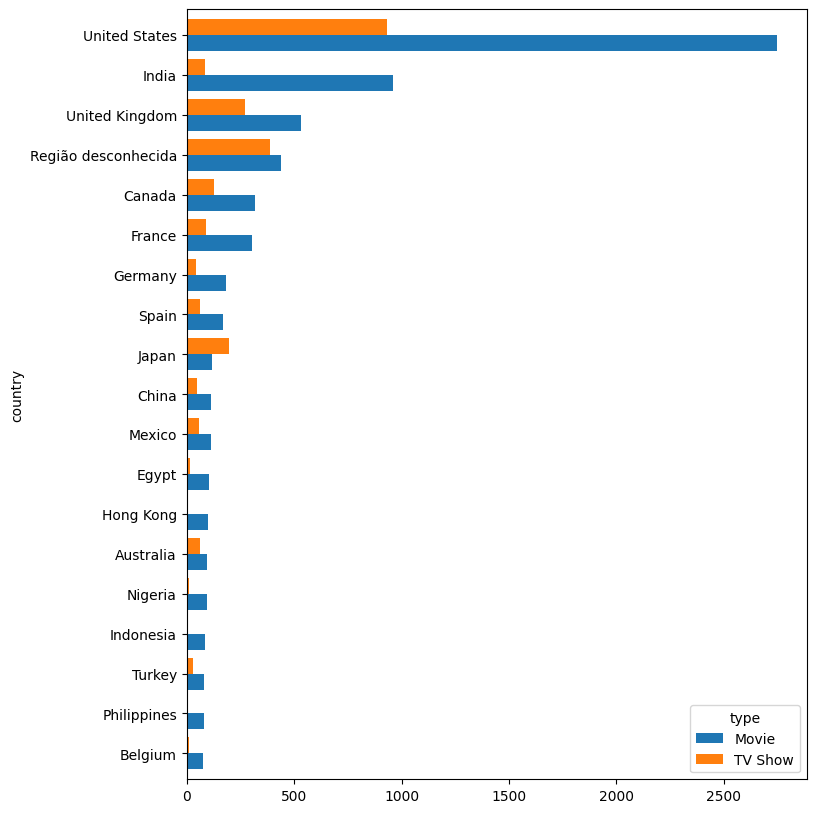

In [22]:
# Gráfico Top 20 países com suas respectivas quantidades de movie e tv show
top_countries.drop(index = 'All', inplace= True)
top_countries[['Movie', 'TV Show']].sort_values(by = 'Movie', ascending = True).plot(kind = 'barh', width=0.8, figsize = (8,10))

Como esperado os Estados Unidos é o país dominante na produção de filmes/séries e por isso se encontra no topo do nosso gráfico. 
Por curiosidade a Índia se encontra em segundo lugar de maior produção de filmes/séries que estão na plataforma da Netflix

Identificando a quantidade de conteúdo na Netflix por ano de Lançamento

In [23]:
# Quantidade de conteúdo por ano de lançamento que estão na netflix
ranking_ano_lancamento = base_netflix['release_year'].value_counts().head(10)
ranking_ano_lancamento

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

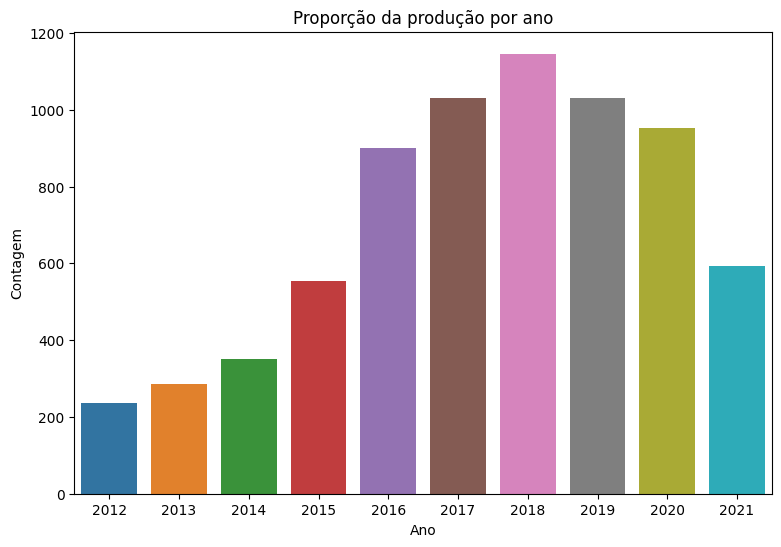

In [24]:
plt.figure(figsize=(9, 6))
sns.barplot(x=ranking_ano_lancamento.index, y=ranking_ano_lancamento.values)
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Proporção da produção por ano')
plt.show()

Verificamos que a maior quantidade de conteúdos presentes na Netflix foram lançados no ano de 2018.

Distribuição do mês de lançamento dos filmes / TV Show(Seirado)

In [25]:
#Quebrando as datas, para filtrar o mês
mes = (
    pd.to_datetime(base_netflix['date_added'])
    .dt.month_name() #argumento para pegar o nome do mês
)
mes

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: date_added, Length: 8790, dtype: object

Como a coluna 'date_added' é do tipo string, precisamos transformá-la em data para manusearmos essa coluna de forma correta. E para sabermos a distribuição do mês de lançamento dos conteúdos, quebramos as datas compostas e filtramos o mês.

In [26]:
#criando um dataframe concatenando por tipo de conteúdo e coluna mês
tipo_e_mes_add = (
    pd.concat([base_netflix['type'], mes], axis=1)
    .rename(columns={'date_added': 'mes_add'})
    .value_counts()
    .reset_index() #iniciando a contagem a partir do 0
    .rename(columns={0: 'count'}) #renomeando a coluna sem nome para "count"

)
tipo_e_mes_add

,type,mes_add,count
0,Movie,July,565
1,Movie,April,549
2,Movie,December,547
3,Movie,January,545
4,Movie,October,545
5,Movie,March,528
6,Movie,September,518
7,Movie,August,518
8,Movie,November,498
9,Movie,June,492


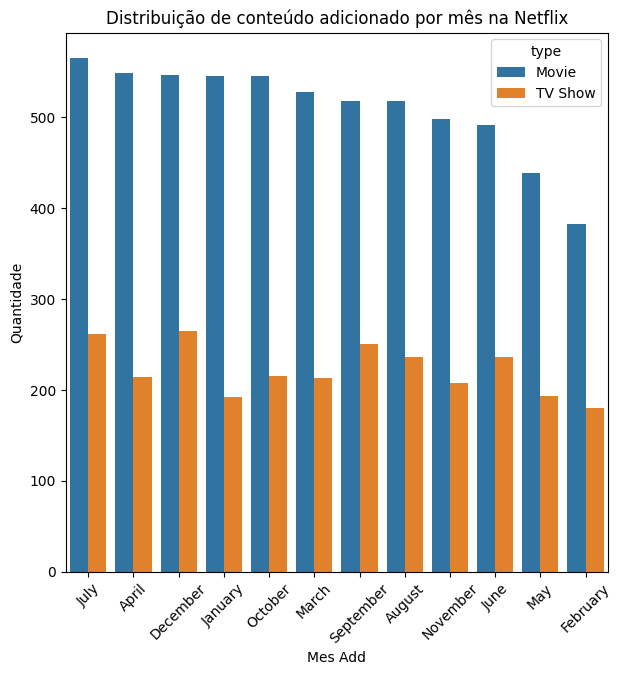

In [27]:
#plotando um gráfico com quais tipos (tv show ou movie) é adicionado com mais frequência por mês

plt.figure(figsize=(7, 7))
sns.barplot(data=tipo_e_mes_add, x='mes_add', y='count', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Mes Add')
plt.ylabel('Quantidade')
plt.title('Distribuição de conteúdo adicionado por mês na Netflix')
plt.show()



Podemos perceber que tanto os Filmes quanto as Séries são mais adicionados nos meses de Julho e Dezembro por serem meses em que geralmente as pessoas estão de recesso ou férias.  

 Identificando total de conteúdo por Diretor

In [28]:
diretores = base_netflix['director']
director_count = (
    pd.value_counts(diretores)
    .to_frame(name = "Total Produções")
    .reset_index()
)
director_count.drop(index = 0, inplace= True)
director_count.head(10)

,index,Total Produções
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12
10,Steven Spielberg,11


Top 10 diretores com produções dentro da plataforma da netflix, sendo Rajiv Chilaka o diretor com maior quantidade de produções.

Distribuição da faixa etária dos Filmes/Tv Show (Seriado)

In [29]:
# Mostrando unicamente as faixas ettárias presentes na coluna rating do dataset
base_netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [30]:
# Total de conteúdos pela faixa etária
base_netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Verificamos que a maior parte dos conteúdos da netflix são para maiores de 18 anos(TV-MA).
Em segundo temos uma grande quantidade de conteúdos para maiores de 14 anos.
E em terceiro temos os conteúdos livres para qualquer idade.

In [31]:
netflix_filmes=base_netflix[base_netflix['type']=='Movie']

Criamos um dataframe só para filmes para separarmos o total desse tipo de conteúdo por faixa etária.

In [32]:
top_movie = pd.crosstab(base_netflix['rating'], netflix_filmes['type'], margins = True).sort_values(by = 'Movie', ascending = False)
top_movie.drop(index = 'All', columns = 'All', inplace= True)
top_movie


type,Movie
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


<AxesSubplot: xlabel='rating'>

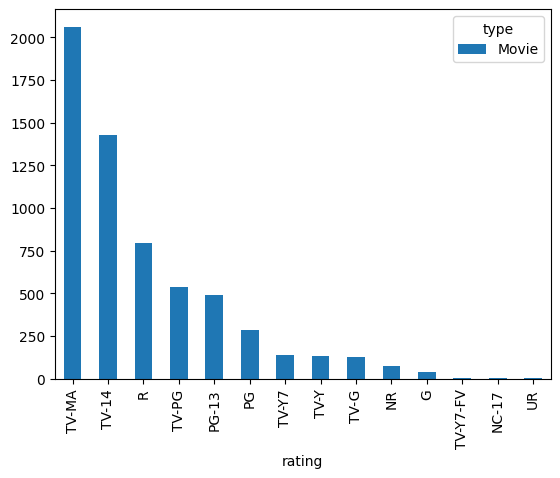

In [33]:
top_movie.plot(kind = 'bar')

In [34]:
netflix_series=base_netflix[base_netflix['type']=='TV Show']

Criamos um dataframe só para séries para separarmos o total desse tipo de conteúdo por faixa etária.

In [35]:
top_serie = pd.crosstab(base_netflix['rating'], netflix_series['type'], margins = True).sort_values(by = 'TV Show', ascending = False)
top_serie.drop(index = 'All', columns = 'All', inplace= True)
top_serie

type,TV Show
rating,
TV-MA,1143
TV-14,730
TV-PG,321
TV-Y7,194
TV-Y,175
TV-G,94
NR,4
R,2
TV-Y7-FV,1


<AxesSubplot: xlabel='rating'>

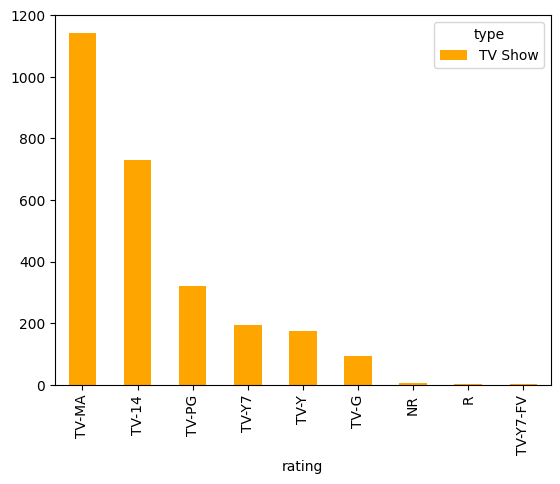

In [36]:
top_serie.plot(kind = 'bar', color = 'orange')

Verificamos que as quantidades de conteúdos por faixa etária são equivalentes para Filmes e Seriados. 

Gêneros mais assistidos na Netflix

In [37]:
# Gêneros mais assistidos
base_netflix['listed_in'] = base_netflix['listed_in'].str.split(', ')
new_base_netflix = base_netflix.explode('listed_in')

Identificamos que algumas linhas da coluna 'listed_in' continha mais de um gênero de conteúdo e decidimos separá-los em linhas diferentes. 

In [38]:
top_generos = new_base_netflix['listed_in'].value_counts().head(20)
top_generos


International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  573
Crime TV Shows               469
Kids' TV                     448
Docuseries                   394
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: listed_in, dtype: int64

<AxesSubplot: >

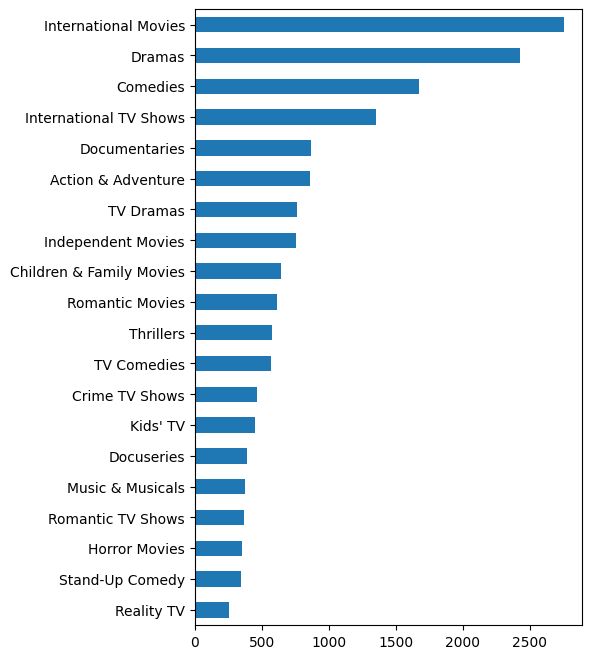

In [39]:
# Gráfico de gêneros mais assistidos, TOP 20
top_generos.sort_values(ascending = True).plot(kind = 'barh', width=0.5, figsize = (5,8))

Identificando a Média de duração dos Filmes e TV Show(Séries)

In [40]:
#Separando os filmes do dataframe, pois como existem TV shows, são medidos por temporadas

netflix_filmes=base_netflix[base_netflix['type']=='Movie']

In [ ]:
netflix_filmes['duration']= netflix_filmes['duration'].str.replace(' min','')
netflix_filmes['duration']= netflix_filmes['duration'].astype(str).astype(int)

Para contabilizarmos a média em relação aos filmes foi preciso transformar a coluna duração em inteiro para retirar a palavra 'min' e substituir por vazio.

In [45]:
netflix_filmes['duration'].mean()

99.58488410055502

Observamos que a média de duração dos filmes na Netflix é de 99.58 minutos, aproximadamente 1h e 40 minutos. 

<AxesSubplot: xlabel='duration', ylabel='Density'>

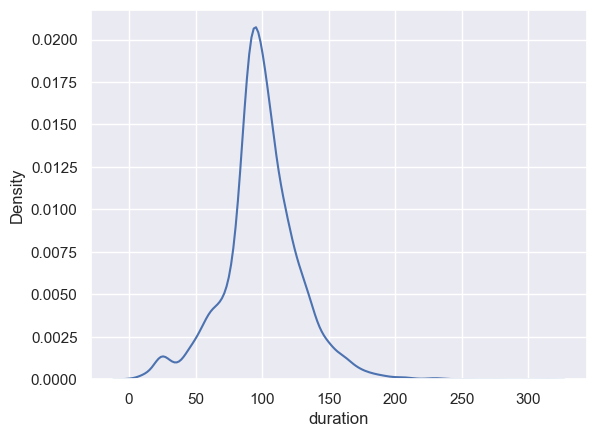

In [43]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_filmes['duration'])

C:\Users\barba\AppData\Local\Temp\ipykernel_54520\993777155.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix_filmes['duration'], fit = stats.norm, kde=False, color=['green'])


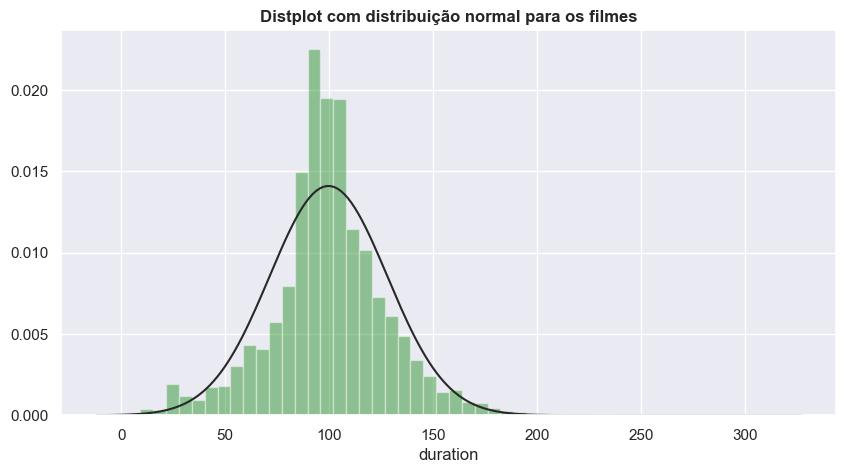

In [59]:
#plotando um gráfico com um displot de distribuição normal para os filmes
from scipy import stats 
plt.figure(figsize=(10,5))
sns.distplot(netflix_filmes['duration'], fit = stats.norm, kde=False, color=['green'])
plt.title('Distplot com distribuição normal para os filmes',fontweight="bold")
plt.show()

Podemos verificar que uma boa quantidade de filmes na Netflix estão entre 75-120 minutos de duração. Esta coerente, considerando o fato de que não são todas pessoas que conseguem ficar mais de 120 minutos assistindo um filme.

In [61]:
netflix_tvshow=base_netflix[base_netflix['type']=='TV Show']

In [ ]:
netflix_tvshow['duration']= netflix_tvshow['duration'].str.replace(' Seasons','')
netflix_tvshow['duration']= netflix_tvshow['duration'].str.replace(' Season','')
netflix_tvshow['duration']= netflix_tvshow['duration'].astype(str).astype(int)
netflix_tvshow['duration']

Para contabilizarmos a média em relação ás séries foi preciso transformar a coluna duração em inteiro para retirar a palavra 'Season' e substituir por vazio.

In [63]:
netflix_tvshow['duration'].mean()

1.7518768768768769

Observamos que a média de temporadas das séries na Netflix é de aproximadamente 2 temporadas. 

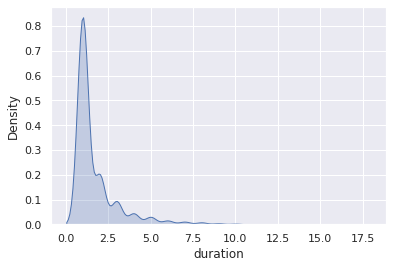

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_tvshow['duration'], shade = True)

Podemos verificar que a maioria das séries da Netflix contém 2 temporadas, mostrando a preferência por séries curtas e o desinteresse por séries mais longas.